In [1]:
from utils.argutils import print_args
from encoder.train import train
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
run_id = input('Name for this model. By default, training outputs will be stored to saved_models/<run_id>/.')

clean_data_root = input('Path to the output directory of encoder_preprocess.py', default='')

models_dir = input('Model directory', default = "saved_models")

vis_every = input('"Number of steps between updates of the loss and the plots.',default=10)

u = input('Number of steps between updates of the umap projection', default=100)
s = input('Number of steps between updates of the model on the disk', default=500)
b = input('Number of steps between backups of the model', default=7500)
f = input('Force restart', default='True')
visdom_server = input('Visdom Server: ',default="http://localhost")
no_visdom = input('Disable visdom?', default = 'True')

args = [run_id, clean_data_root, models_dir, vis_every, u, s, b, f, visdom_server, no_visdom]

# Run the training
epochs, cosine_simil_train, cosine_simil_test = train(args)
clear_output()

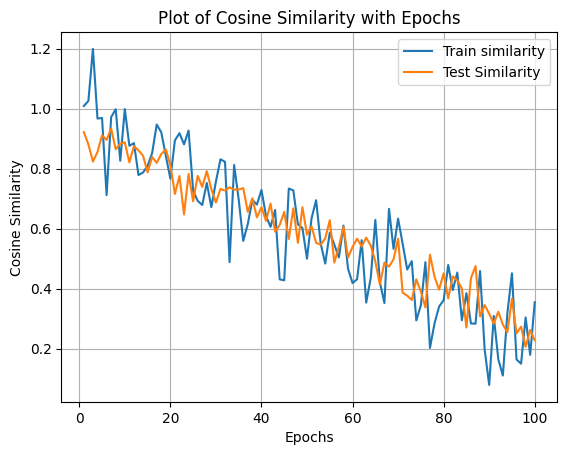

In [3]:
plt.plot(epochs, cosine_simil_train, marker='', linestyle='-', label='Train similarity')
plt.plot(epochs, cosine_simil_test, marker='', linestyle='-', label='Test Similarity')  # Adding another line

plt.xlabel('Epochs')
plt.ylabel('Cosine Similarity')
plt.title('Plot of Cosine Similarity with Epochs')
plt.legend()

plt.grid(True)
plt.show()